In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, regularizers

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data_cln = data.fillna({'children': 0.0, 'country': 'Unknown', 'agent':0, 'company': 0})

In [4]:
data_cln['meal'].replace('Undefined', 'SC', inplace = True)

In [1]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc

In [6]:
resort_data = data_cln[data_cln.hotel == 'Resort Hotel']

In [7]:
city_data = data_cln[data_cln.hotel == 'City Hotel']

In [8]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"] # hotel

# Separate features and predicted value
features = num_features + cat_features

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

total hotel

In [9]:
# 10 fold
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

X = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"].to_numpy()

X = preprocessor.fit_transform(X)

result = []

for train_index, test_index in split.split(y):
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [10]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [11]:
total_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [12]:
# total
for k, v in total_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.8115211614186092 0.8204223739935519 0.8178309550006843
acc 	 0.8238545941871178 0.8312253957617891 0.8286791188541753
f1 	 0.7589684813753582 0.776356418173798 0.7703584600511888
pre 	 0.7511343012704175 0.7747808496291302 0.7648613214290159
recall 	 0.7669678017141534 0.7805100182149363 0.7759720486658128


resort hotel

In [13]:
# 10 fold
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

X = resort_data.drop(["is_canceled"], axis=1)[features]
y = resort_data["is_canceled"].to_numpy()

X = preprocessor.fit_transform(X)

result = []

for train_index, test_index in split.split(y):
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [14]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [15]:
resort_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [16]:
# resort
for k, v in resort_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.7687872037855048 0.8018875260240298 0.7890188794092986
acc 	 0.8147778332501248 0.8427358961557664 0.828307538691962
f1 	 0.6624203821656052 0.7123287671232876 0.6937580867835473
pre 	 0.6570397111913358 0.7129798903107861 0.6870092061065975
recall 	 0.6678899082568808 0.7179715302491103 0.7007119379686533


city hotel

In [17]:
# 10 fold
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

X = city_data.drop(["is_canceled"], axis=1)[features]
y = city_data["is_canceled"].to_numpy()

X = preprocessor.fit_transform(X)

result = []

for train_index, test_index in split.split(y):
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [18]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [19]:
city_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [20]:
# city
for k, v in city_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.8218361398814861 0.8308787671645466 0.8272468283408575
acc 	 0.8276818353712341 0.835245178368839 0.8317786461616035
f1 	 0.7898539584934666 0.8020596698470392 0.7987028303552453
pre 	 0.7904615384615384 0.8047955733169382 0.7975317973478622
recall 	 0.789247311827957 0.8071925052886069 0.7999094225303668


resort to city

In [21]:
x = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"].to_numpy()

x = preprocessor.fit_transform(x)

train_x = x[data_cln.hotel == 'Resort Hotel']
train_y = y[data_cln.hotel == 'Resort Hotel']

test_x = x[data_cln.hotel == 'City Hotel']
test_y = y[data_cln.hotel == 'City Hotel']

result = []
for i in range(10):
    model = DecisionTreeClassifier()
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [22]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [23]:
rc_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [24]:
# resort to city
for k, v in rc_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.6730144223930431 0.6926010314036801 0.6842325846070179
acc 	 0.6791882011849237 0.6984747258288163 0.6905710323963191
f1 	 0.623163942193793 0.6453085852371281 0.6353210922716491
pre 	 0.6111111111111112 0.6381084170627519 0.6250942073505306
recall 	 0.6357017702857833 0.6574829315449218 0.6459247175397257


city to resort

In [25]:
x = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"].to_numpy()

x = preprocessor.fit_transform(x)

test_x = x[data_cln.hotel == 'Resort Hotel']
test_y = y[data_cln.hotel == 'Resort Hotel']

train_x = x[data_cln.hotel == 'City Hotel']
train_y = y[data_cln.hotel == 'City Hotel']

result = []
for i in range(10):
    model = DecisionTreeClassifier()
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    result.append({'pred': pred_y, 'test': test_y})

In [26]:
total_accuracy = []
total_f1 = []
total_pre = []
total_recall = []
total_auc = []
for i in range(10):
    pred = result[i]['pred']
    test = result[i]['test']
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    total_auc.append(roc_auc)
    total_accuracy.append(accuracy_score(test, pred))
    total_f1.append(f1_score(test, pred))
    total_pre.append(precision_score(test, pred))
    total_recall.append(recall_score(test, pred))

In [27]:
cr_res = {'auc':total_auc, 'acc': total_accuracy, 'f1': total_f1,
            'pre': total_pre, 'recall': total_recall}

In [28]:
# city to resort
for k, v in cr_res.items():
    print(k, '\t', min(v), max(v), np.average(v))

auc 	 0.5832033870750268 0.5944465394264025 0.5885749785032355
acc 	 0.6655516724912631 0.6778332501248128 0.6710409385921118
f1 	 0.39503105590062115 0.41619060271910013 0.40486723546642667
pre 	 0.3977538185085355 0.41413169041201386 0.4067987347756049
recall 	 0.38599172810645566 0.4224959539651142 0.40314691602229813


In [29]:
acc_box = np.array([total_res['acc'], resort_res['acc'], city_res['acc'], rc_res['acc'], cr_res['acc']])
pre_box = np.array([total_res['pre'], resort_res['pre'], city_res['pre'], rc_res['pre'], cr_res['pre']])
rec_box = np.array([total_res['recall'], resort_res['recall'], city_res['recall'], rc_res['recall'], cr_res['recall']])
f1_box = np.array([total_res['f1'], resort_res['f1'], city_res['f1'], rc_res['f1'], cr_res['f1']])
auc_box = np.array([total_res['auc'], resort_res['auc'], city_res['auc'], rc_res['auc'], cr_res['auc']])

In [30]:
np.max(acc_box)

0.8427358961557664

In [31]:
np.min(acc_box)

0.6655516724912631

In [32]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:


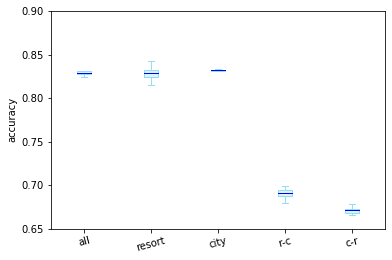

In [33]:

c= '#92DFF3'
f, axs = plt.subplots()
rl_data_3 = np.array([[0.0965, 0.0780, 0.1351, 0.0749],
                     [0.0916, 0.0804, 0.1253, 0.0751],
                     [0.0973, 0.0769, 0.1292, 0.0706],
                     [0.1052, 0.0792, 0.1301, 0.0780],
                     [0.0928, 0.0747, 0.1327, 0.0801]])

axs.boxplot(np.transpose(acc_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.65,0.9)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('accuracy')
plt.savefig('DecisionTreeAcc.png')

In [34]:
pre_box.min()

0.3977538185085355

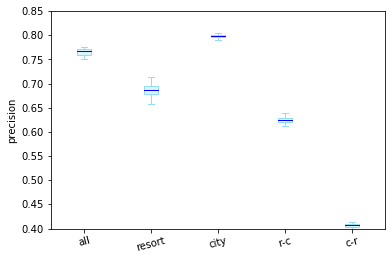

In [35]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(pre_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.4,0.85)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('precision')
plt.savefig('DecisionTreePre.png')

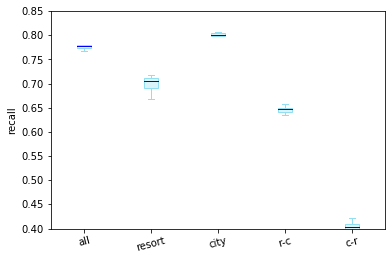

In [36]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(rec_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.4,0.85)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('recall')
plt.savefig('DecisionTreeRec.png')

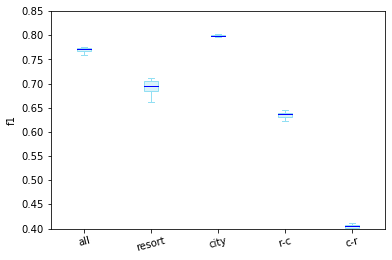

In [37]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(f1_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.4,0.85)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('f1')
plt.savefig('DecisionTreeF1.png')

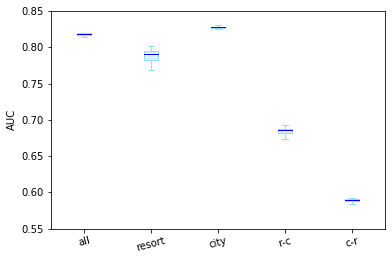

In [38]:

c= '#92DFF3'
f, axs = plt.subplots()

axs.boxplot(np.transpose(auc_box), showfliers=False, widths = 0.2 ,patch_artist=True,
            boxprops=dict(facecolor='#DBF3FA', color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='blue'),)
axs.set_ylim(0.55,0.85)
axs.set_xticklabels(['all', 'resort', 'city', 'r-c', 'c-r'],
                    rotation=15, fontsize=10)
axs.set_ylabel('AUC')
plt.savefig('DecisionTreeAUC.png')